In [2]:
# Import libraries.
import IPython.display
import pandas

# Methods presentation to Connected Bradford user group
## 2022 12 12

The purpose of this notebook is to showcase:
- [Opencodelists.org](https://www.opencodelists.org/) for making clinical codelists.
- Reading codelist into Jupyter notebooks.
- Using codelists when querying the Connected Bradford data tables.
- Suggestions for disclosure control.

This notebook was first presented to the Connected Bradford user group at the regular Monday meeting on the 12th December 2022.

## Codelists and [opencodelists.org](https://www.opencodelists.org/)

In this section, I introduce [opencodelists.org](https://www.opencodelists.org/), how it can help you with your project, how to use it.
<br/>

But to begin, let's just clarify what a codelist is. A codelist is a list or set of clinical codes. Clinical codes are (alpha)numeric IDs used to identify clinical concepts. There are many different coding schemes - which might also be referred to as "terminologies" or "dictionaries" or "nomenclatures" or "taxonomies" - but you can think of them all as particular naming-and-filing conventions. Examples include SNOMED-CT, CTV3, DM+D, BNF, ICD, and OPCS.
<br/>

OPCS is used in surgery, ICD is used for classifying diseases, BNF and DM+D are used for medicines and pharmacy concepts, CTV3 is for clinical concepts and was historically used in primary care, and SNOMED-CT is a general naming-and-filing convention for all clinical concepts.
<br/>
<br/>
<br/>

With that said, let's go on to opencodelists.org.
<br/>
<br/>

__TL;DR - The opencodelists.org web tool is a browswer-based tool developed by [OpenSAFELY](https://www.opensafely.org) that helps users define lists of clinical codes and export them to CSV. Watch the tutorial videos on the homepage.__ 

<br/>
<br/>

### What is opencodelists.org?

- The opencodelists.org web tool is a browswer-based tool developed by [OpenSAFELY](https://www.opensafely.org) that helps users define lists of clinical codes.
- The user can share draft lists with other users for review and sign-off before publishing them to the opencodelist database.
- The opencodelist database contains many codelists created or informed by individual researchers, by research groups, and by institutions.
- A selected codelist can be exported to CSV for use.

### How will opencodelists.org help me with my work?

- Its basis on the web means that you can access opencodelists.org anywhere with an internet connection.

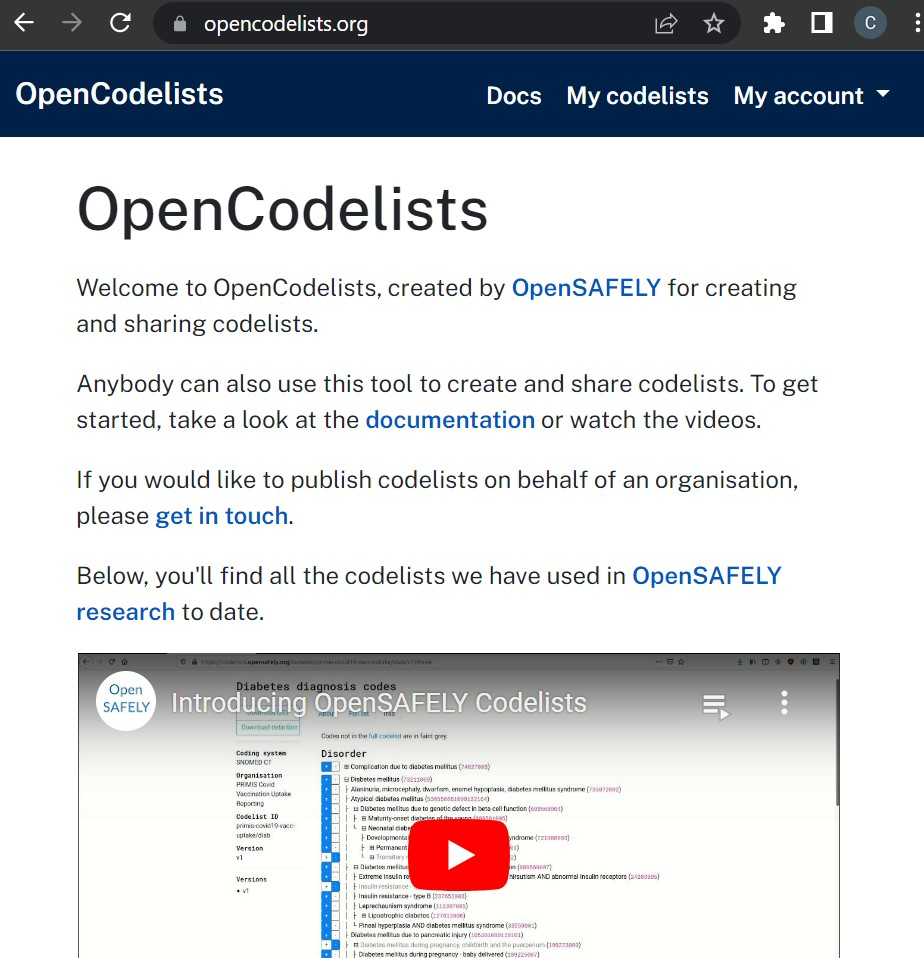

In [4]:
IPython.display.Image("opencodelists_homepage.jpg", width = 400)

<br/>
<br/>

- Its database of existing codelists means you might be able to find the ideal codelist to define your patient cohort without having to reinvent the list.
- Its databse of existing codelists provide starting points for defining your own codelists, by adding to existing codelists or by amalgamating them.

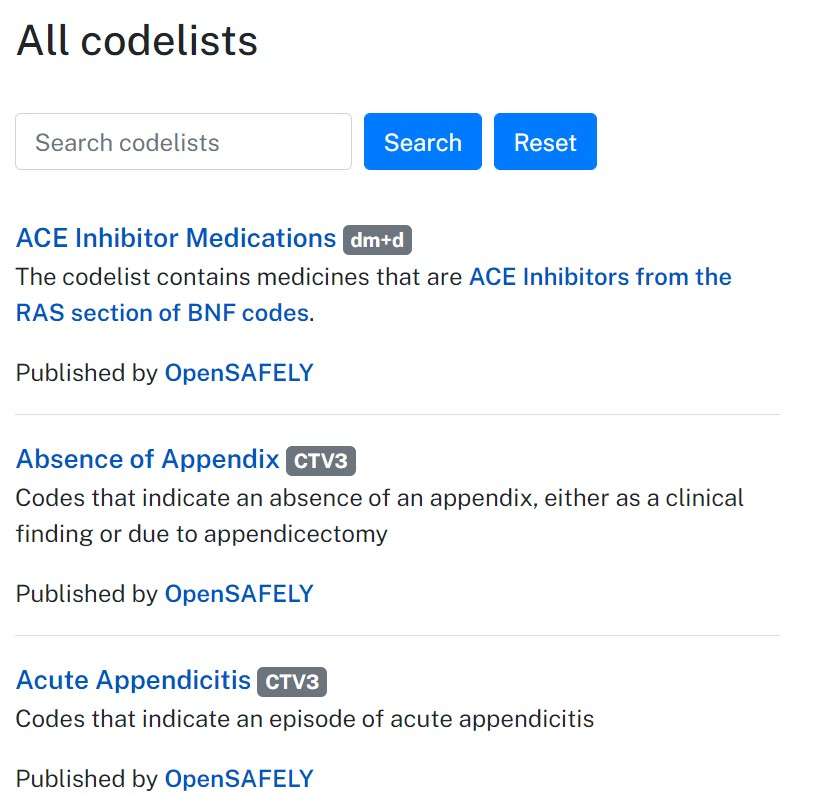

In [5]:
IPython.display.Image("opencodelists_search.jpg", width = 400)

<br/>
<br/>

- The workflow to create a codelist is designed with the user in mind.
- It includes functionality to search an entire coding schema for key words.

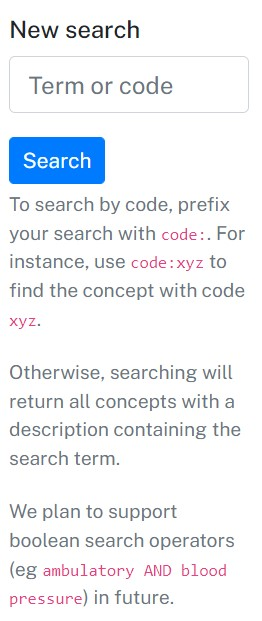

In [16]:
IPython.display.Image("opencodelists_searchTerm.jpg", width = 200)

<br/>
<br/>

- The default CSV output is a widely accepted format.
- Each codelist is accompanied by metadata about its definition.

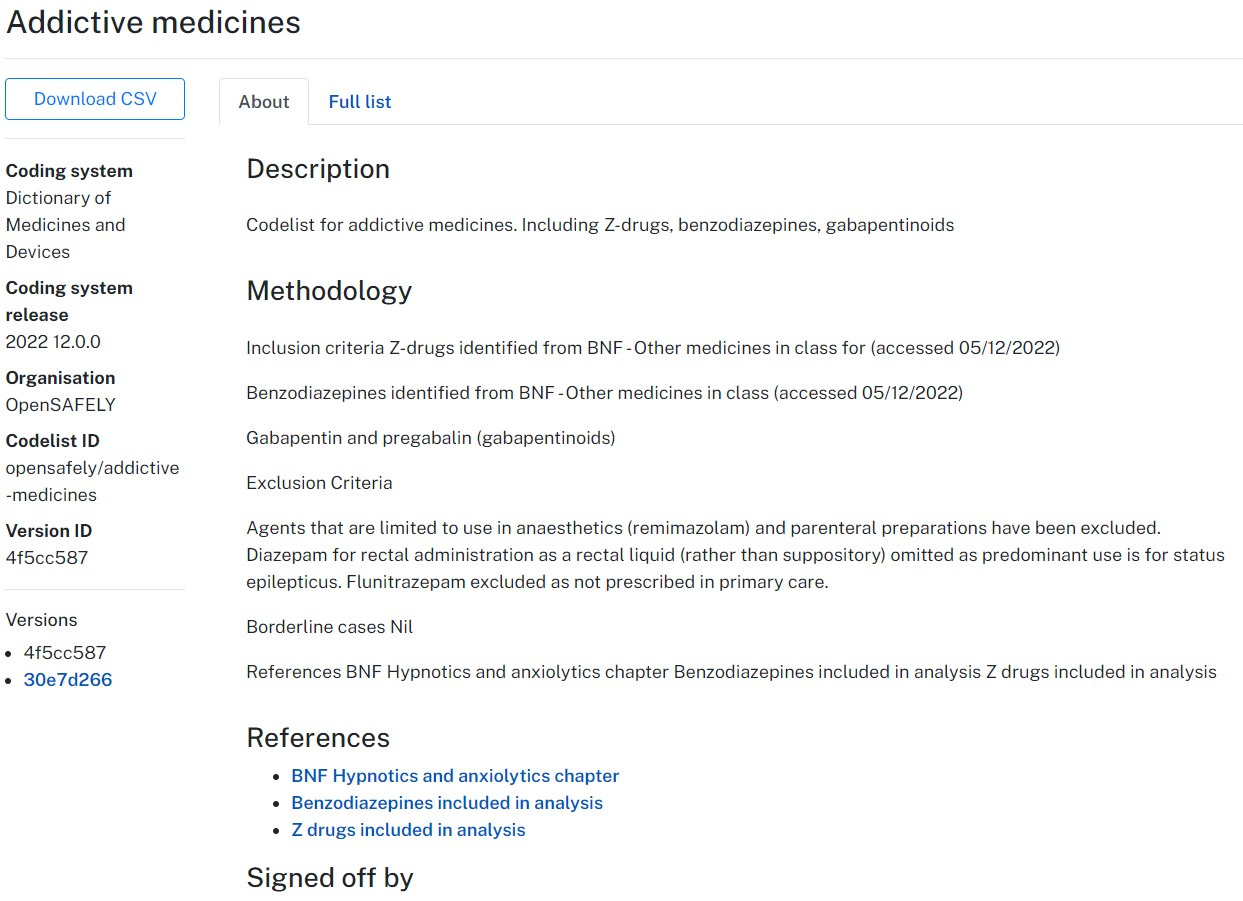

In [10]:
IPython.display.Image("opencodelists_metadata_example.jpg", width = 600)

<br/>
<br/>

- Its can be used to make codelists for many schema/nomenclature/terminology. (Note: OPCS-4.9 is also available [via another route](https://github.com/opensafely/documentation/discussions/576), and [see here for guidance on using DM+D](https://github.com/opensafely/documentation/discussions/890)).

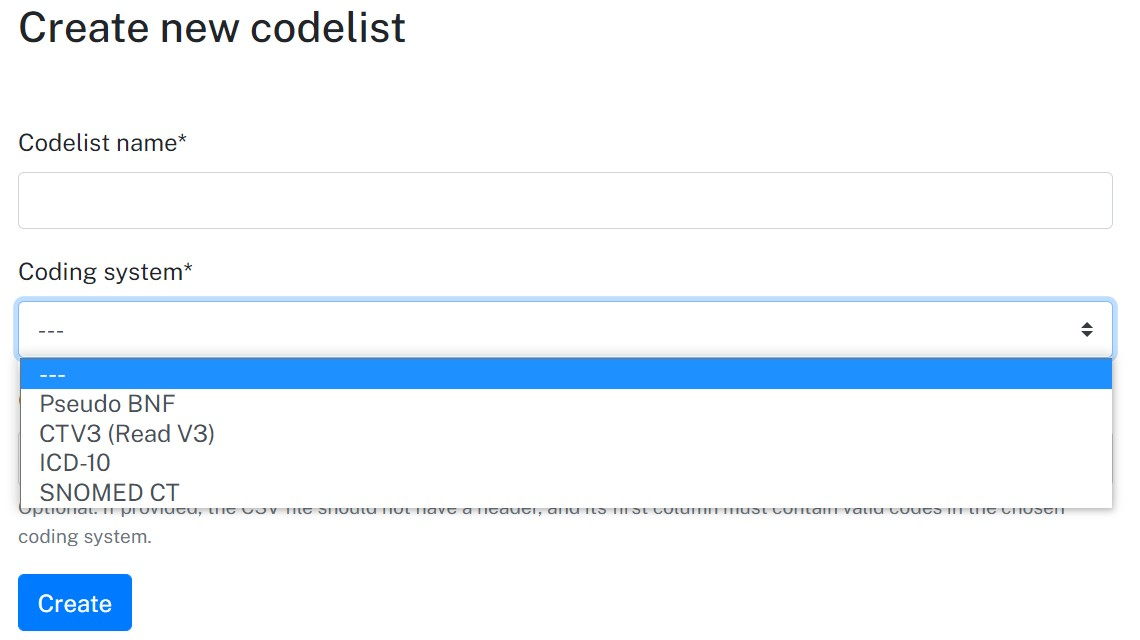

In [11]:
IPython.display.Image("opencodelists_create_codingSchema.jpg", width = 400)

<br/>
<br/>

- Existing CSVs can be uploaded to define codelists in the database or to start you off with developing yours further.

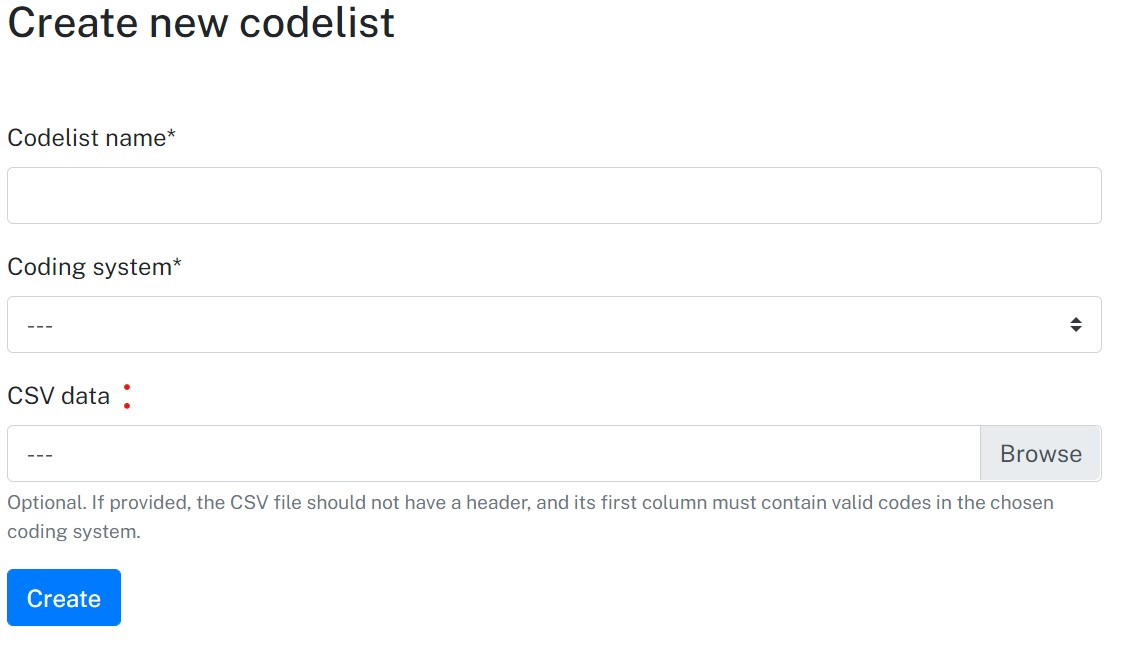

In [12]:
IPython.display.Image("opencodelists_uploadCSV.jpg", width = 400)

<br/>
<br/>

- It includes functionality to easily include and exclude individual and collections of clinical codes by clicking `+` and `-` buttons. And it will alert you to "unresolved" issues if your selections lead to contradictions.

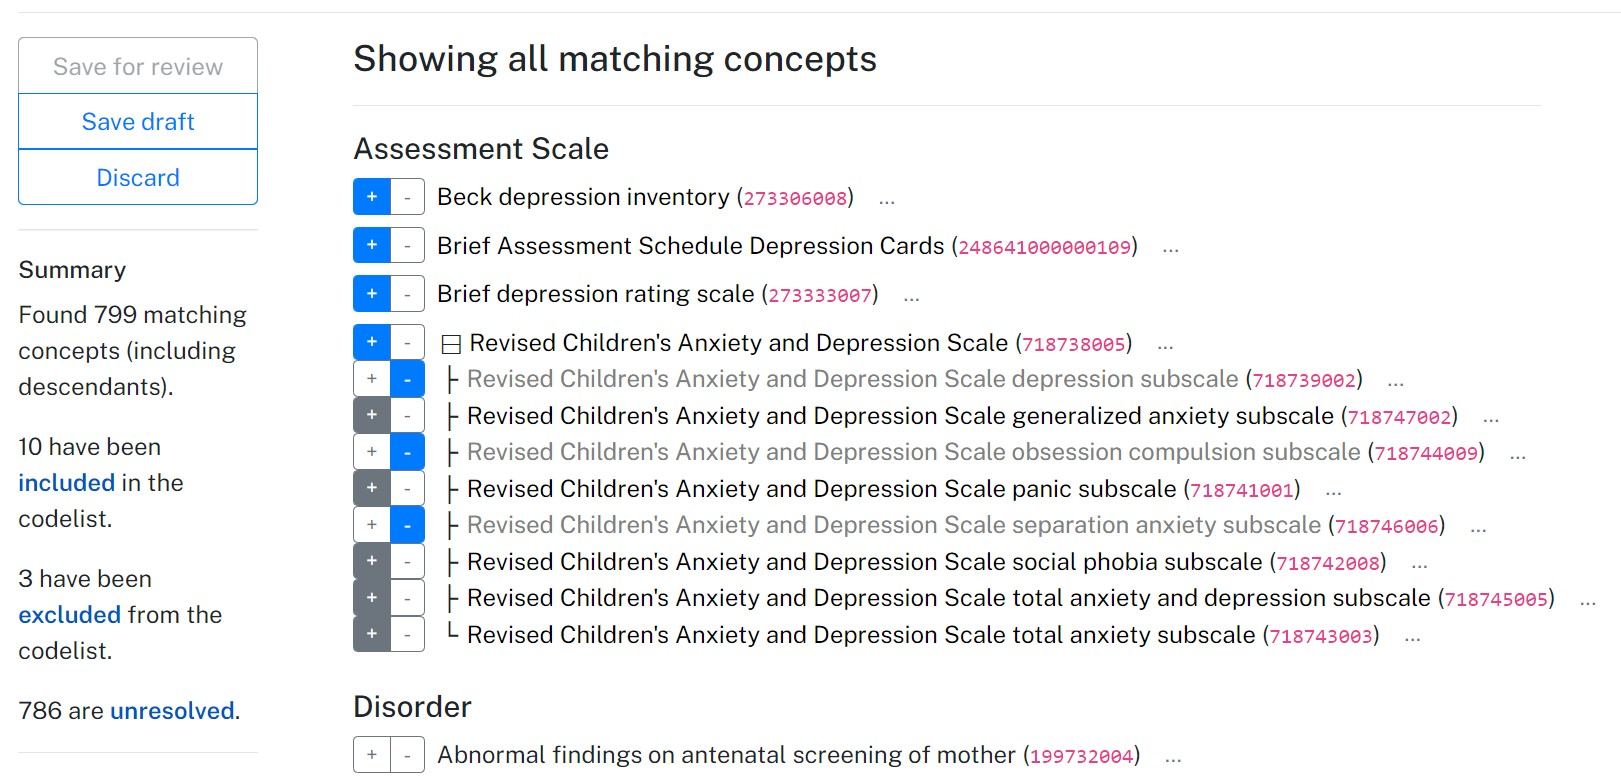

In [14]:
IPython.display.Image("opencodelists_inclExcl.jpg", width = 600)

<br/>
<br/>

### How do I use opencodelists.org?
Tutorial videos are available on the [opencodelists.org](https://www.opencodelists.org/) homepage.
<br/>
For those present at the meeting on the 12th December 2022, I walked through the process for creating a codelist.

<br/>
<br/>

## Using codelists to query Connected Bradford.

In this section, I present _a_ method for using codelists to query Connected Bradford data tables, though other methods are available, no doubt. I make use of the [google.cloud.bigquery()](https://pypi.org/project/google-cloud-bigquery/) to run SQL syntax, rather than using Python's [magic-cell functionality](https://levelup.gitconnected.com/how-to-run-sql-queries-in-jupyter-lab-1cbb1e3b1c04).

The basics of google.cloud.bigquery() involve setting up a "client" that will accept your SQL syntax and run it against the database.
<br/>
To set up a client, first we import the `google.cloud.bigquery` library, then set up our client.

In [2]:
# Import libraries.
from google.cloud import bigquery

# Instantiate bigQuery client.
client = bigquery.Client()

<br/>
<br/>

The bigquery client accepts SQL syntax as a string.
<br/>
For example:

In [15]:
# Define string of SQL syntax.


my_sql_syntax = """
SELECT
    src_snomedcode
FROM
    yhcr-prd-phm-bia-core.CY_FDM_PrimaryCare_v5.tbl_SRCode
WHERE
    src_snomedcode <> 'None'
LIMIT
    5
"""

# Run SQL string and store in a pandas.DataFrame.
client_query_output = \
        client.query(
                    my_sql_syntax
                    ).to_dataframe()

client_query_output

,src_snomedcode
0,219006
1,219006
2,219006
3,219006
4,219006


<br/>
<br/>

The handy thing about the client accepting SQL syntax as a string is that we can easily join strings of SQL syntax.
<br/>
For example, we might want to define a Common Table Expression (CTE) to use in our main SQL query:

In [16]:
# Define string for Common Table Expression SQL syntax.
my_cte_table = """
WITH
my_cte_table AS
(
    SELECT
        src_snomedcode
    FROM
        yhcr-prd-phm-bia-core.CY_FDM_PrimaryCare_v5.tbl_SRCode
    WHERE
        src_snomedcode <> 'None'
)
"""

# Define string of SQL syntax.
my_sql_syntax = """
SELECT 
    src_snomedcode
FROM
    my_cte_table
ORDER BY
    src_snomedcode
LIMIT
    5
"""

# Join our SQL strings, run, and store in a pandas.DataFrame.
client_query_output = \
        client.query(
                    my_cte_table +
                    my_sql_syntax
                    ).to_dataframe()

client_query_output

,src_snomedcode
0,10001005
1,10001005
2,10001005
3,10001005
4,10001005


<br/>
<br/>
This ability to join strings to make SQL queries makes it easy to integrate codelist. In the next code block, I re-run part of our previous search but restrict my search to records that have a particular set of clinical codes. I explicitly specify this code list as SQL syntax in the WHERE clause by saying `WHERE src_snomedcode IN ('13746004', '20010003', '192080009', '58214004')`.

In [21]:
# Define string of SQL syntax.
my_sql_syntax = """
    SELECT
        src_snomedcode
    FROM
        yhcr-prd-phm-bia-core.CY_FDM_PrimaryCare_v5.tbl_SRCode
    WHERE
        src_snomedcode IN ('13746004', '20010003', '192080009', '58214004')
"""

# Join our SQL strings, run, and store in a pandas.DataFrame.
client_query_output = \
        client.query(
                    my_sql_syntax
                    ).to_dataframe()

client_query_output

,src_snomedcode
0,13746004
1,13746004
2,13746004
3,13746004
4,13746004
...,...
19469,58214004
19470,58214004
19471,192080009
19472,192080009


<br/>
<br/>
That works just fine but what if my set of clinical codes is much larger? What if I have a large codelist?
<br/>
<br/>
First, I will load my CSV file codelist that I downloaded from opencodelist.org.

In [19]:
# Load my codelist into a Python pandas data frame
codes_to_query = pandas.read_csv("ciaranmci-bipolar-disorder-6a0308d7.csv")

<br/>
<br/>
I can convert my codelist to a long string of values that is appropriate for the SQL WHERE clause:

In [27]:
'\', \''.join(map(str, codes_to_query["code"].tolist()))

"10875004', '10981006', '111485001', '1196001', '12969000', '133091000119105', '13313007', '13581000', '13746004', '14495005', '1499003', '162004', '16238741000119105', '16295005', '16506000', '17782008', '191618007', '191620005', '191621009', '191623007', '191625000', '191627008', '191629006', '191630001', '191634005', '191636007', '191638008', '191639000', '191641004', '191643001', '192362008', '19300006', '20960007', '21900002', '22121000', '22407005', '231444002', '23741000119105', '261000119107', '26203008', '26530004', '271000119101', '28663008', '28884001', '29929003', '30520009', '30687003', '30935000', '31446002', '33380008', '34315001', '3530005', '35481005', '35722002', '35846004', '36583000', '371596008', '371599001', '371600003', '371604007', '38368003', '40926005', '41552001', '41832009', '41836007', '43568002', '43769008', '4441000', '45479006', '46229002', '48937005', '49468007', '49512000', '51637008', '53049002', '53607008', '54761006', '55516002', '5703000', '5961700

<br/>
<br/>
With my codelist converted into a string of comma-separated numbers, I can replace `WHERE src_snomedcode IN ('13746004', '20010003', '192080009', '58214004')` with my much larger list without having to explicitly type all the codes of interest.

In [32]:
# Define string of SQL syntax.
my_sql_syntax = """
    SELECT
        src_snomedcode
    FROM
        yhcr-prd-phm-bia-core.CY_FDM_PrimaryCare_v5.tbl_SRCode
    WHERE
        src_snomedcode IN ('""" + \
    '\', \''.join(map(str, codes_to_query["code"].tolist())) + \
    """')
"""

# Join our SQL strings, run, and store in a pandas.DataFrame.
client_query_output = \
        client.query(
                    my_sql_syntax
                    ).to_dataframe()

client_query_output    

,src_snomedcode
0,13746004
1,13746004
2,13746004
3,13746004
4,83225003
...,...
17449,85248005
17450,191618007
17451,191625000
17452,191625000


<br/>
<br/>

And there we have it: a way to integrate a codelist into your SQL query. You can use this approach to define a study cohort, by asking for the `person_id` to be returned instead of the clinical code.

<br/>
<br/>

## Disclosure control

In this section, I show how OpenSAFELY encode [statistical disclosure control](https://ukdataservice.ac.uk/app/uploads/thf_datareport_aw_web.pdf) into users' scripts as a first line of defence against disclosure, i.e. against identifiability of a person or organisation. More details about OpenSAFELY's approach are available in their [extensive, open-source documentation](https://docs.opensafely.org/releasing-files/).

### Redaction and rounding

#### What?
__Redaction__ refers to the removal of parts of a completed artefact, like a document or data table. The [section about redaction OpenSAFELY's webpage](https://docs.opensafely.org/releasing-files/#redacting-counts-less-than-or-equal-to-5) says any counts $\le5$ should be redacted (as of 11:54 7th December 2022). The redacted values can be imputed by a suitable NA, NAN or NULL value, depending on the data format and processing language. The redaction helps to avoid primary disclosure.
<br/>
In practice, OpenSAFELY now operate a policy of redacting any values $\le7$.

__Rounding__ refers to replacing the a number with some close-by number, based on some consistent rule. A classic example is rounding decimal numbers to the nearest whole number. The [section about rounding OpenSAFELY's webpage](https://docs.opensafely.org/releasing-files/#rounding-counts) says any not-redacted counts should be rounded to the nearest multiple of $5$ (as of 11:54 7th December 2022). The rounding helps to avoid secondary disclosure, e.g. by combined data from multiple tables.
<br/>
In practice, OpenSAFELY now operate a policy of rounding to the nearest $10$.


#### How?
Redaction and rounding should be done immediately after (if not in the process of) retrieving counts from querying Connected Bradford tables. This ensures that all subsequent calculations are based on data that has already been subjected to disclosure-control, which helps guard against secondary disclosure by, for example, back calculating from percentages or propotions.
<br/>
<br/>
A simple example of Python syntax to redact and then round to the nearest multiple of a number is shown below, for both a Python native list and a Python pandas dataframe. Further below is example SQL syntax for the same job.
<br/>
<br/>

##### _Python redacton and rounding._

In [34]:
# Import libraries.
import random
import numpy
import pandas

# Specify the redaction threshold.
redaction_threshold = 7
# Specify the target rounding number.
target_round = 10
# Simulate example data.
my_random_list = [random.randrange(20) for i in range(10)]
my_random_dataframe = pandas.DataFrame(my_random_list)
print("Not-redacted and not-rounded random numbers (list):", my_random_list)
#print("Not-redacted and not-rounded random numbers (dataframe):", my_random_dataframe)


# Redact numbers below the redaction threshold.
redacted_list = [numpy.NaN if i <= redaction_threshold else i for i in my_random_list]
redacted_dataframe = my_random_dataframe.applymap(lambda x: numpy.nan if x <= redaction_threshold else x)
print("\n\nRedacted but not rounded random numbers (list):", redacted_list)
#print("\n\nRedacted but not rounded random numbers (dataframe):", redacted_dataframe)

# Round numbers to target rounding number.
redacted_rounded_list = numpy.round((numpy.array(redacted_list) / target_round)) * target_round
redacted_rounded_dataframe = (round(redacted_dataframe / target_round) * target_round)
print("\n\nRedacted and rounded random numbers (list):", redacted_rounded_list)
#print("\n\nRedacted and rounded random numbers (dataframe):", redacted_rounded_dataframe)


# Do it all in one.
redacted_rounded_list_2 = numpy.round((numpy.array([numpy.NaN if i <= redaction_threshold else i for i in my_random_list]) / target_round)) * target_round
redacted_rounded_dataframe_2 =  (my_random_dataframe.applymap(lambda x: numpy.nan if x <= redaction_threshold else x) / target_round).round() * target_round
#print("\n\nRedacted and rounded random numbers (list):", redacted_rounded_list_2)
#print("\n\nRedacted and rounded random numbers (dataframe):", redacted_rounded_dataframe_2)

Not-redacted and not-rounded random numbers (list): [13, 13, 11, 4, 6, 18, 1, 2, 19, 5]


Redacted but not rounded random numbers (list): [13, 13, 11, nan, nan, 18, nan, nan, 19, nan]


Redacted and rounded random numbers (list): [10. 10. 10. nan nan 20. nan nan 20. nan]


<br/>
<br/>

##### _SQL BigQuery redacton and rounding._
An example of redacting and rounding directly from a SQL query is shown below.

In [6]:
# Import libraries.
from google.cloud import bigquery

# Instantiate bigQuery client.
client = bigquery.Client()

# Specify the redaction threshold.
# ## 
# ## I update the redaction threshold to a much larger number
# ## just to illustrate an example redaction in the output.
redaction_threshold = 1000
target_round = 10

# Define strings of SQL syntax.
# ##
# ## Declare your redaction threshold and target rounding number.
sql_variables = """
DECLARE redaction_threshold INT64 DEFAULT """ + str(redaction_threshold) + """;
DECLARE target_round INT64 DEFAULT """ + str(target_round) + """;
"""

# ## Define your fundamental SQL query.
# ##
# ## This is the syntax for the query you are actually
# ## interested in, but which needs to be redacted and rounded.
my_sql_syntax = """
SELECT
    src_snomedcode,
    COUNT(person_id) AS my_count
FROM
    yhcr-prd-phm-bia-core.CY_FDM_PrimaryCare_v5.tbl_SRCode
WHERE
    src_snomedcode IN ('13746004', '20010003', '192080009', '58214004')
GROUP BY
    src_snomedcode
"""

# Define the redaction SQL syntax.
# ##
# ## This string is written as a Common Table Expression and
# ## is expected to follow a my_sql_syntax Common Table 
# ## Expression and use it as an input.
redact_sql = """
,redact_sql AS
(
    SELECT
        src_snomedcode,
        CASE
            WHEN my_count <= redaction_threshold THEN NULL
            ELSE my_count
        END AS redacted_counts
    FROM
        my_sql_syntax
)
"""

# Define the rounding SQL syntax.
# ##
# ## This string is written on the assumption that it is run 
# ## as the final piece of SQL syntax, and that it accepts 
# ## redact_sql as input.
round_sql = """
SELECT
    src_snomedcode,
    ROUND(redacted_counts / target_round ) * target_round AS redacted_rounded_counts
FROM
    redact_sql
"""

# Run all SQL strings and store in a pandas.DataFrame.
bqTable = client.query(sql_variables +
                       "WITH my_sql_syntax AS (" +
                       my_sql_syntax +
                       ")" +
                       redact_sql +
                       round_sql
                      ).to_dataframe()
print("We redacted counts that were less than or equal to", redaction_threshold, ".")
print("We rounded the redacted counts to the nearest", target_round, ".")
bqTable

We redacted counts that were less than or equal to 1000 .
We rounded the redacted counts to the nearest 10 .


,src_snomedcode,redacted_rounded_counts
0,20010003,NaN
1,58214004,6840.0
2,192080009,3520.0
3,13746004,8450.0
